## Visualization of Schism results

In [1]:
#to use the full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri
from netCDF4 import Dataset
from scipy.io import loadmat
import pandas as pd
from scipy.interpolate import griddata


In [2]:
from Poseidon.utils import *


In [3]:
from matplotlib import animation,rc

rc('animation',html='html5')


In [4]:
%matplotlib inline

In [5]:
#g=loadmat('/home/critechproc/STORAGE/SCHISM/test1/nodes.mat')
#g['nodes'][:].shape

In [6]:
#extract number of elements, number of nodes
ne,nn = pd.read_csv('/home/critechproc/STORAGE/SCHISM/test1/hgrid.gr3',header=0,skiprows=1,nrows=0,delim_whitespace=True)

In [7]:
ne=int(ne)
nn=int(nn)

In [8]:
#read lon,lat,depth for all nodes
q=pd.read_csv('/home/critechproc/STORAGE/SCHISM/test1/hgrid.gr3',skiprows=2,header=None,delim_whitespace=True,engine='python',nrows=nn,names=['id','x','y','z'])

In [9]:
q=q.set_index(['id'])

In [10]:
e = pd.read_csv('/home/critechproc/STORAGE/SCHISM/test1/hgrid.gr3',skiprows=nn+2,header=None,delim_whitespace=True,engine='python',nrows=ne,names=['id','nv','a','b','c'])

In [11]:
e=e.set_index(['id'])

In [12]:
r = Dataset('/home/critechproc/STORAGE/SCHISM/test1/outputs/schism_history.nc')

In [13]:
r.variables.keys()

[u'ocean_time',
 u'ocean_time_day',
 u'ocean_time_str',
 u'kbp00',
 u'idry',
 u'WATLEV',
 u'davx',
 u'davy']

In [14]:
r.variables['WATLEV'].shape

(144, 175156)

## plot

In [15]:
triangles = e.loc[:,['a','b','c']].values

In [16]:
triangles.shape

(339138, 3)

In [16]:
triangles[:-2,:].max()

175155

In [17]:
x = q.loc[:,['x']].values.flatten()
y = q.loc[:,['y']].values.flatten()

In [20]:
triang=tri.Triangulation(x,y)

In [21]:
x.shape,y.shape

((175156,), (175156,))

In [22]:
z = q.loc[:,['z']].values.flatten()

In [17]:
h = r.variables['WATLEV'][-1,:]

In [19]:
minlon=-35. # lat/lon window
maxlon=43.
minlat=24.5
maxlat=76.5

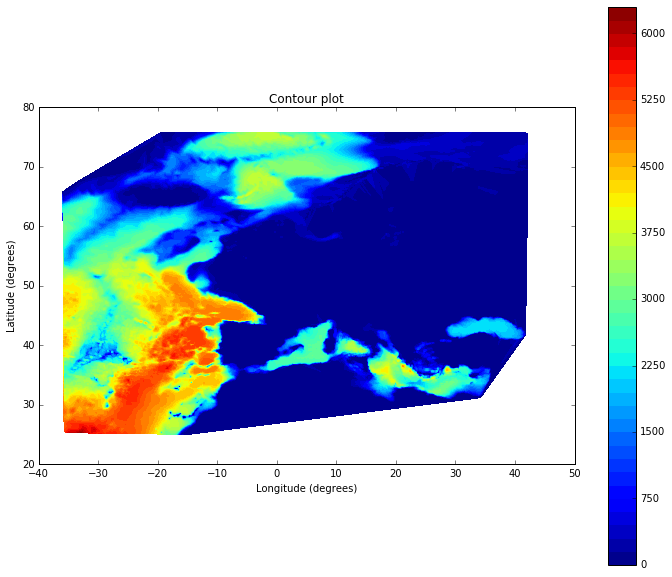

In [24]:
plt.figure(figsize=(12,10))
plt.gca().set_aspect('equal')
plt.tricontourf(triang, z, 50)
plt.colorbar()
plt.title('Contour plot')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

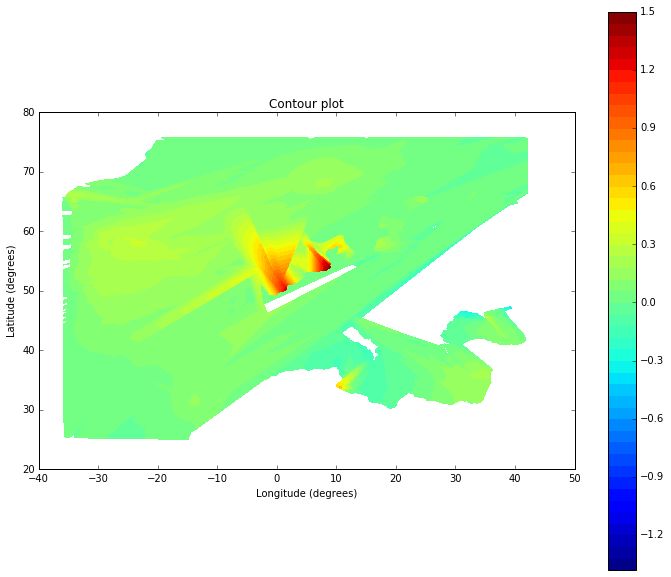

In [22]:
plt.figure(figsize=(12,10))
plt.gca().set_aspect('equal')
plt.tricontourf(x, y, triangles[:-2,:], h, 50, )
plt.colorbar()
plt.title('Contour plot')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

## interpolating to Cartesian grid

In [28]:
win={'lon0':x.min(), # lat/lon window of the figure
     'lon1':x.max(),
     'lat0':y.min(),
     'lat1':y.max()}

In [29]:
xi = np.linspace(np.min(x), np.max(x), 100)
yi = np.linspace(np.min(y), np.max(y), 100)
zia = griddata((x,y),h,(xi[None,:],yi[:,None]),method='linear')

In [37]:
lons,lats = np.meshgrid(xi,yi)

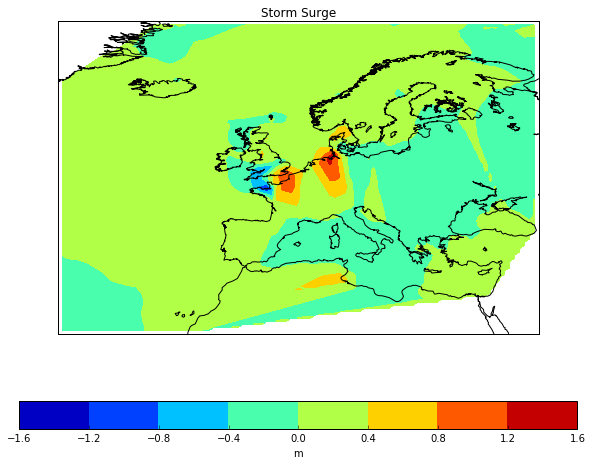

In [38]:
map(lons,lats,zia,title='Storm Surge',label='m',ticks=False,**win)

## anim

In [21]:
fig = plt.figure(figsize=(12,8))
ax=ax = plt.gca()
plt.gca().set_aspect('equal')

In [22]:
ims = []
for i in range(len(h[1:,0])):
        im = ax.tricontourf(x, y, h[i,:], 50)
#        im = ax.contourf(x,y,z[i,:,:],v,vmin=v1,vmax=v2,latlon=True)
        add_arts = im.collections
        text = 'time={0!r}'.format(i)
        te = ax.text(90, 90, text)
        an = ax.annotate(text, xy=(-0.25, 0.95), xycoords='axes fraction')
        ims.append(add_arts + [te,an])
    
#cbar_ax = fig.add_axes([0.05, 0.05, 0.85, 0.05])    
#cbar = plt.colorbar(ticks=v,orientation='horizontal', extend='both')#,fraction=0.046, pad=0.04)
#cbar = plt.colorbar()

In [23]:
anim = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat=False)

In [24]:
anim

In [40]:
xy.shape

(74, 2)

In [41]:
triangles.max()

73

## using mayavi

In [1]:
from mayavi import mlab
mlab.init_notebook()

SystemExit: Unable to access the X Display, is $DISPLAY set properly?

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
%tb

SystemExit: Unable to access the X Display, is $DISPLAY set properly?

In [3]:
import toolkit

ImportError: No module named toolkit

In [19]:
mlab.triangular_mesh(x,y,h,triangles,scalars=h)

NameError: name 'mlab' is not defined